## Observations and Insights 

# Executive Summary

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.head())
print(study_results.head())


  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [16]:
## Clean data
# Check for duplicate mouse data in metadata
# print(mouse_metadata["Mouse ID"].describe())        # 240 unique mice

# Check study_results - how many unique timepoints?
# print(len(study_results["Timepoint"].unique()))     # shows 10 unique timepoints;
# print(study_results["Timepoint"].describe())        # shows 1893 records. I.e. not 2490 (10x249) so some mice dropped out during study.
# print(study_results["Mouse ID"].describe())

## Where a mouse has duplicate data for a given timepoint, eliminate entirety of that mouse data from study_results
# Index study_results, by timepoint
tp_index_df = study_results.set_index("Timepoint")
print(tp_index_df.head())
# Count number of values of Mouse ID. If a mouse ID returns > 10, means there is duplicate data of said mouse.
print(tp_index_df["Mouse ID"].value_counts())           # mouse ID g989 has duplicate data, delete all data for said mouse ID.

# Look at g989 data
dirty_mouse = study_results.loc[(study_results["Mouse ID"] == "g989")]      # data isn't duplicated, as results aren't duplicated, their different, i.e. 2 results recorded where 1 was required, therefore delete all data.
print(dirty_mouse.shape)

# Delete all g989 mouse ID data: from 1) study_results; 2) mouse_metadata
clean_study_results = study_results.loc[(study_results["Mouse ID"] != "g989")]
clean_mouse_metadata = mouse_metadata.loc[(mouse_metadata["Mouse ID"] != "g989")]

# Compare shape of cleaned vs original data
print(clean_study_results.shape)
print(study_results.shape)          # Shows 13 records were deleted, which is what expected.

print(mouse_metadata.shape)
print(clean_mouse_metadata.shape)   # Shows 1 mouse was deleted, expected

          Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Timepoint                                               
0             b128                45.0                 0
0             f932                45.0                 0
0             g107                45.0                 0
0             a457                45.0                 0
0             c819                45.0                 0
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64
(13, 4)
(1880, 4)
(1893, 4)
(249, 5)
(248, 5)


In [20]:
# Combine the data into a single dataset
combined_df = pd.merge(clean_study_results, clean_mouse_metadata, on="Mouse ID")
# print(combined_df.head())

# print(clean_study_results.columns)
# print(clean_mouse_metadata.columns)
# print(combined_df.columns)              # All columns from above to files included
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [27]:
# Checking the number of mice.
print(combined_df["Mouse ID"].describe())
print(mouse_metadata["Mouse ID"].describe())
print(study_results["Mouse ID"].describe())

# New cleaned combined data, has 248 unique mice (i.e. Mouse IDs), shows 1 mouse was dropped (g989).

count     1880
unique     248
top       b128
freq        10
Name: Mouse ID, dtype: object
count      249
unique     249
top       k403
freq         1
Name: Mouse ID, dtype: object
count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## Where a mouse has duplicate data for a given timepoint, eliminate entirety of that mouse data from study_results
# Index study_results, by timepoint
tp_index_df = study_results.set_index("Timepoint")
print(tp_index_df.head())
# Count number of values of Mouse ID. If a mouse ID returns > 10, means there is duplicate data of said mouse.
print(tp_index_df["Mouse ID"].value_counts())           # mouse ID g989 has duplicate data, delete all data for said mouse ID.


          Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Timepoint                                               
0             b128                45.0                 0
0             f932                45.0                 0
0             g107                45.0                 0
0             a457                45.0                 0
0             c819                45.0                 0
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 

dirty_mouse = study_results.loc[(study_results["Mouse ID"] == "g989")]      # data isn't duplicated, as results aren't duplicated, their different, i.e. 2 results recorded where 1 was required, therefore delete all data.
print(dirty_mouse)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1
1195     g989         25           56.045564                 1
1380     g989         30           59.082294                 1
1592     g989         35           62.570880                 2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Done, refer above and here:   combined_df = pd.merge(clean_study_results, clean_mouse_metadata, on="Mouse ID")

In [40]:
# Checking the number of mice in the clean DataFrame.
print(combined_df["Mouse ID"].describe())

count     1880
unique     248
top       b128
freq        10
Name: Mouse ID, dtype: object


## Summary Statistics

In [84]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Identify all the regimens:
# combined_df["Drug Regimen"].unique()
# Returns the following regimens:   (['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
                                    # 'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'


# Create new df's by filtering each regimen from clean df, creating a df for each regimen
Capomulin_df = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin")]
tum_Capomulin_df = Capomulin_df["Tumor Volume (mm3)"]

Ketapril_df = combined_df.loc[(combined_df["Drug Regimen"] == "Ketapril")]
tum_Ketapril_df = Ketapril_df["Tumor Volume (mm3)"]

Naftisol_df = combined_df.loc[(combined_df["Drug Regimen"] == "Naftisol")]
tum_Naftisol_df = Naftisol_df["Tumor Volume (mm3)"]

Infubinol_df = combined_df.loc[(combined_df["Drug Regimen"] == "Infubinol")]
tum_Infubinol_df = Infubinol_df["Tumor Volume (mm3)"]

Stelasyn_df = combined_df.loc[(combined_df["Drug Regimen"] == "Stelasyn")]
tum_Stelasyn_df = Stelasyn_df["Tumor Volume (mm3)"]

Ramicane_df = combined_df.loc[(combined_df["Drug Regimen"] == "Ramicane")]
tum_Ramicane_df = Ramicane_df["Tumor Volume (mm3)"]

Zoniferol_df = combined_df.loc[(combined_df["Drug Regimen"] == "Zoniferol")]
tum_Zoniferol_df = Zoniferol_df["Tumor Volume (mm3)"]

Propriva_df = combined_df.loc[(combined_df["Drug Regimen"] == "Propriva")]
tum_Propriva_df = Propriva_df["Tumor Volume (mm3)"]

Placebo_df = combined_df.loc[(combined_df["Drug Regimen"] == "Placebo")]
tum_Placebo_df = Placebo_df["Tumor Volume (mm3)"]

Ceftamin_df = combined_df.loc[(combined_df["Drug Regimen"] == "Ceftamin")]
tum_Ceftamin_df = Ceftamin_df["Tumor Volume (mm3)"]


# Calc, mean, median, variance, stdev for each regimen
mean_Capo = np.mean(tum_Capomulin_df)
median_Capo = np.median(tum_Capomulin_df)
var_Capo = np.var(tum_Capomulin_df,ddof=0)
sd_Capo = np.std(tum_Capomulin_df,ddof=0)
sem_Capo = np.std(tum_Capomulin_df,ddof=1) / np.sqrt(np.size(tum_Capomulin_df))

mean_Keta = np.mean(tum_Ketapril_df)
median_Keta = np.median(tum_Ketapril_df)
var_Keta = np.var(tum_Ketapril_df,ddof=0)
sd_Keta = np.std(tum_Ketapril_df,ddof=0)
sem_Keta = np.std(tum_Ketapril_df,ddof=1) / np.sqrt(np.size(tum_Ketapril_df))

mean_Naft = np.mean(tum_Naftisol_df)
median_Naft = np.median(tum_Naftisol_df)
var_Naft = np.var(tum_Naftisol_df,ddof=0)
sd_Naft = np.std(tum_Naftisol_df,ddof=0)
sem_Naft = np.std(tum_Naftisol_df,ddof=1) / np.sqrt(np.size(tum_Naftisol_df))

mean_Infu = np.mean(tum_Infubinol_df)
median_Infu = np.median(tum_Infubinol_df)
var_Infu = np.var(tum_Infubinol_df,ddof=0)
sd_Infu = np.std(tum_Infubinol_df,ddof=0)
sem_Infu = np.std(tum_Infubinol_df,ddof=1) / np.sqrt(np.size(tum_Infubinol_df))

mean_Stel = np.mean(tum_Stelasyn_df)
median_Stel = np.median(tum_Stelasyn_df)
var_Stel = np.var(tum_Stelasyn_df,ddof=0)
sd_Stel = np.std(tum_Stelasyn_df,ddof=0)
sem_Stel = np.std(tum_Stelasyn_df,ddof=1) / np.sqrt(np.size(tum_Stelasyn_df))

mean_Rami = np.mean(tum_Ramicane_df)
median_Rami = np.median(tum_Ramicane_df)
var_Rami = np.var(tum_Ramicane_df,ddof=0)
sd_Rami = np.std(tum_Ramicane_df,ddof=0)
sem_Rami = np.std(tum_Ramicane_df,ddof=1) / np.sqrt(np.size(tum_Ramicane_df))

mean_Zoni = np.mean(tum_Zoniferol_df)
median_Zoni = np.median(tum_Zoniferol_df)
var_Zoni = np.var(tum_Zoniferol_df,ddof=0)
sd_Zoni = np.std(tum_Zoniferol_df,ddof=0)
sem_Zoni = np.std(tum_Zoniferol_df,ddof=1) / np.sqrt(np.size(tum_Zoniferol_df))

mean_Prop = np.mean(tum_Propriva_df)
median_Prop = np.median(tum_Propriva_df)
var_Prop = np.var(tum_Propriva_df,ddof=0)
sd_Prop = np.std(tum_Propriva_df,ddof=0)
sem_Prop = np.std(tum_Propriva_df,ddof=1) / np.sqrt(np.size(tum_Propriva_df))

mean_Plac = np.mean(tum_Placebo_df)
median_Plac = np.median(tum_Placebo_df)
var_Plac = np.var(tum_Placebo_df,ddof=0)
sd_Plac = np.std(tum_Placebo_df,ddof=0)
sem_Plac = np.std(tum_Placebo_df,ddof=1) / np.sqrt(np.size(tum_Placebo_df))

mean_Ceft = np.mean(tum_Ceftamin_df)
median_Ceft = np.median(tum_Ceftamin_df)
var_Ceft = np.var(tum_Ceftamin_df,ddof=0)
sd_Ceft = np.std(tum_Ceftamin_df,ddof=0)
sem_Ceft = np.std(tum_Ceftamin_df,ddof=1) / np.sqrt(np.size(tum_Ceftamin_df))

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Create new dataframe for summary of stats

summarystats_df = pd.DataFrame({
    "Drug Regimen": ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
    "Mean": [mean_Capo, mean_Keta, mean_Naft, mean_Infu, mean_Stel, mean_Rami, mean_Zoni, mean_Prop, mean_Plac, mean_Ceft],
    "Median": [median_Capo, median_Keta, median_Naft, median_Infu, median_Stel, median_Rami, median_Zoni, median_Prop, median_Plac, median_Ceft],
    "Variance": [var_Capo, var_Keta, var_Naft, var_Infu, var_Stel, var_Rami, var_Zoni, var_Prop, var_Plac, var_Ceft],
    "Standard Deviation": [sd_Capo, sd_Keta, sd_Naft, sd_Infu, sd_Stel, sd_Rami, sd_Zoni, sd_Prop, sd_Plac, sd_Ceft],
    "SEM":[sem_Capo, sem_Keta, sem_Naft, sem_Infu, sem_Stel, sem_Rami, sem_Zoni, sem_Prop, sem_Plac, sem_Ceft]
})
summarystats_df.set_index("Drug Regimen")


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331


In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# Set Drug Regimen as index
dr_combined_df = combined_df.set_index("Drug Regimen")

# Group by Drug Regimen
grp_dr_combined = dr_combined_df.groupby("Drug Regimen")

# Calc mean, median, var, std, sem of Tumor Volume
tum_mean_df = grp_dr_combined["Tumor Volume (mm3)"].mean()
tum_median_df = grp_dr_combined["Tumor Volume (mm3)"].median()
tum_var_df = grp_dr_combined["Tumor Volume (mm3)"].var()
tum_std_df = grp_dr_combined["Tumor Volume (mm3)"].std()
tum_sem_df = grp_dr_combined["Tumor Volume (mm3)"].sem()

# Merge calcs into new DF
ss_df = pd.merge(tum_mean_df, tum_median_df, on="Drug Regimen", suffixes=("_mean", "_med"))
ss_df2 = pd.merge(ss_df, tum_var_df, on="Drug Regimen")
ss_df3 = pd.merge(ss_df2, tum_std_df, on="Drug Regimen", suffixes=("_var", "_std"))
ss_df4 = pd.merge(ss_df3, tum_sem_df, on="Drug Regimen")

# Rename columns
final_ss_bygroupby_df = ss_df4.rename(columns={"Tumor Volume (mm3)_mean": "Mean", "Tumor Volume (mm3)_med": "Median",
                                               "Tumor Volume (mm3)_var": "Variance",
                                               "Tumor Volume (mm3)_std": "Standard Deviation",
                                               "Tumor Volume (mm3)": "SEM"})

# Display summary stats, based on method of groupby and calcing using pandas, not numpy calcs
final_ss_bygroupby_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


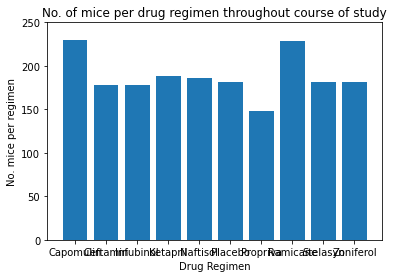

<Figure size 1440x720 with 0 Axes>

In [129]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Calc # of mice p/regimen, by groupby, then count, then select mouce ID column
# Create new variable for Groupby "Drug Regimen", to prevent code break, and to manipulate here
grp_dr_combined2 = dr_combined_df.groupby("Drug Regimen")
grp_dr_mouse = grp_dr_combined2.count()
print(grp_dr_mouse["Mouse ID"])


# Set x and y axis data
mice = grp_dr_mouse["Mouse ID"]
x_axis = np.arange(len(combined_df["Drug Regimen"].unique()))

# Plot bar chart
plt.bar(x_axis, mice, align="center")

# Tick locations, designated what ticks are (ie. drugs)
drugs = grp_dr_mouse.index.to_list()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

# Set limits
plt.ylim(0,250)

# Format chart
plt.title("No. of mice per drug regimen throughout course of study")
plt.xlabel("Drug Regimen")
plt.ylabel("No. mice per regimen")
plt.figure(figsize=(20,10))
# plt.tight_layout()

(0.0, 250.0)

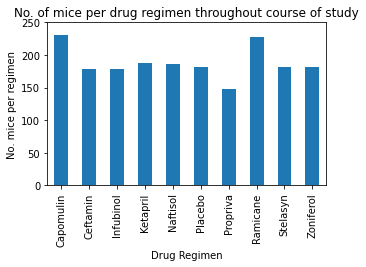

In [139]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x-axis
# x_axis2 = np.arange(len(combined_df["Drug Regimen"].unique()))

reg_and_mousecount = grp_dr_mouse["Mouse ID"]

reg_and_mousecount.plot(kind="bar", figsize=(5,3))
plt.title("No. of mice per drug regimen throughout course of study")
plt.xlabel("Drug Regimen")
plt.ylabel("No. mice per regimen")
plt.ylim(0,250)


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
